<a href="https://colab.research.google.com/github/Pranit07G/PG-AlmaBetter-EDA-AirBNB-NYC/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Projects/EDA/Airbnb/Airbnb NYC 2019.csv'

bnb_nyc = pd.read_csv(path)

In [6]:
bnb_nyc.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
bnb_nyc.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


From above, we can easily identify that the columns "price" and "minimun_nights" may be having outliers. But removing these columns may have an impact on the overall data. Hence, we classify the data into sub categories or bins for the two columns. As for the number_of_reviews and calculated host_istings_count columns, the data corresponds to the response recieved from the customers in general and the number oflistings for a particular host, hence we cannot classify outlier data for these two columns.

In [7]:
bnb_nyc.describe(include=['object','category'])


,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47905,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


In [8]:
# Get an overview of the contents of each column.
bnb_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [9]:
# Check the no of null values in each column
bnb_nyc.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
# Replace null values in last_review column by NaN 
bnb_nyc["last_review"].fillna('NaN', inplace = True)
# Replace null values in reviews_per_month by 0 
bnb_nyc["reviews_per_month"].fillna(0, inplace = True)

In [11]:
bnb_nyc.isnull().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [12]:
bnb_nyc.nunique(axis = 0)

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1765
reviews_per_month                   938
calculated_host_listings_count       47
availability_365                    366
dtype: int64

It can be seen that the 'id' column can be considered as a unique identifier for the data. Also, 'host_id' uniquely identifies the hosts while the 'host_name' contains duplicate value and even null values. Hence, we can drop the column 'name' and 'host_name' from the above dataset to clean the data. 

In [13]:
bnb_nyc.drop(["name","host_name"], axis = 1, inplace = True)
# bnb_nyc_wo.drop(["name","host_name"], axis = 1, inplace = True)

In [15]:
bnb_nyc.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


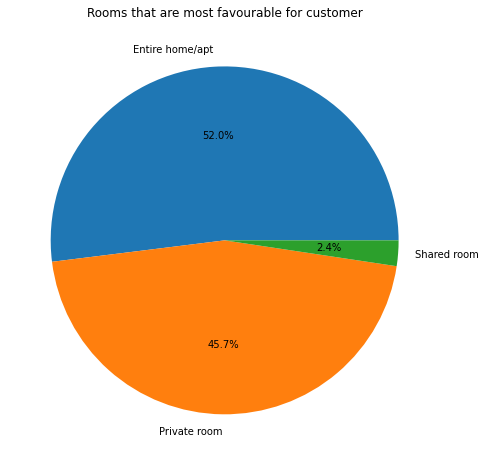

In [18]:
#The rooms that customers choose the most
labels = bnb_nyc['room_type'].value_counts().index
sizes = bnb_nyc['room_type'].value_counts().values
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Rooms that are most favourable for customer", color = 'black',fontsize = 12);

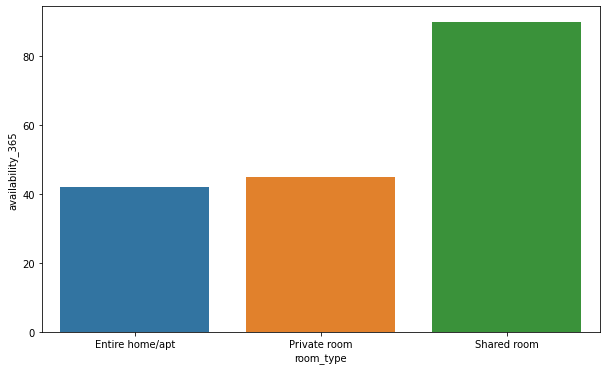

In [19]:
#Availability as per room type
room_type_mean_price = bnb_nyc.groupby("room_type")["availability_365"].median().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=room_type_mean_price, x=room_type_mean_price["room_type"], y=room_type_mean_price["availability_365"], palette='tab10');



It can be seen from the above bar chart that the shared rooms have the highest availabily as compared to Entire Home/ Apt or a Private Room. This re-inforces the earlier findings about the Entire Home/ Apt or a Private Room being the most popular booking choice.

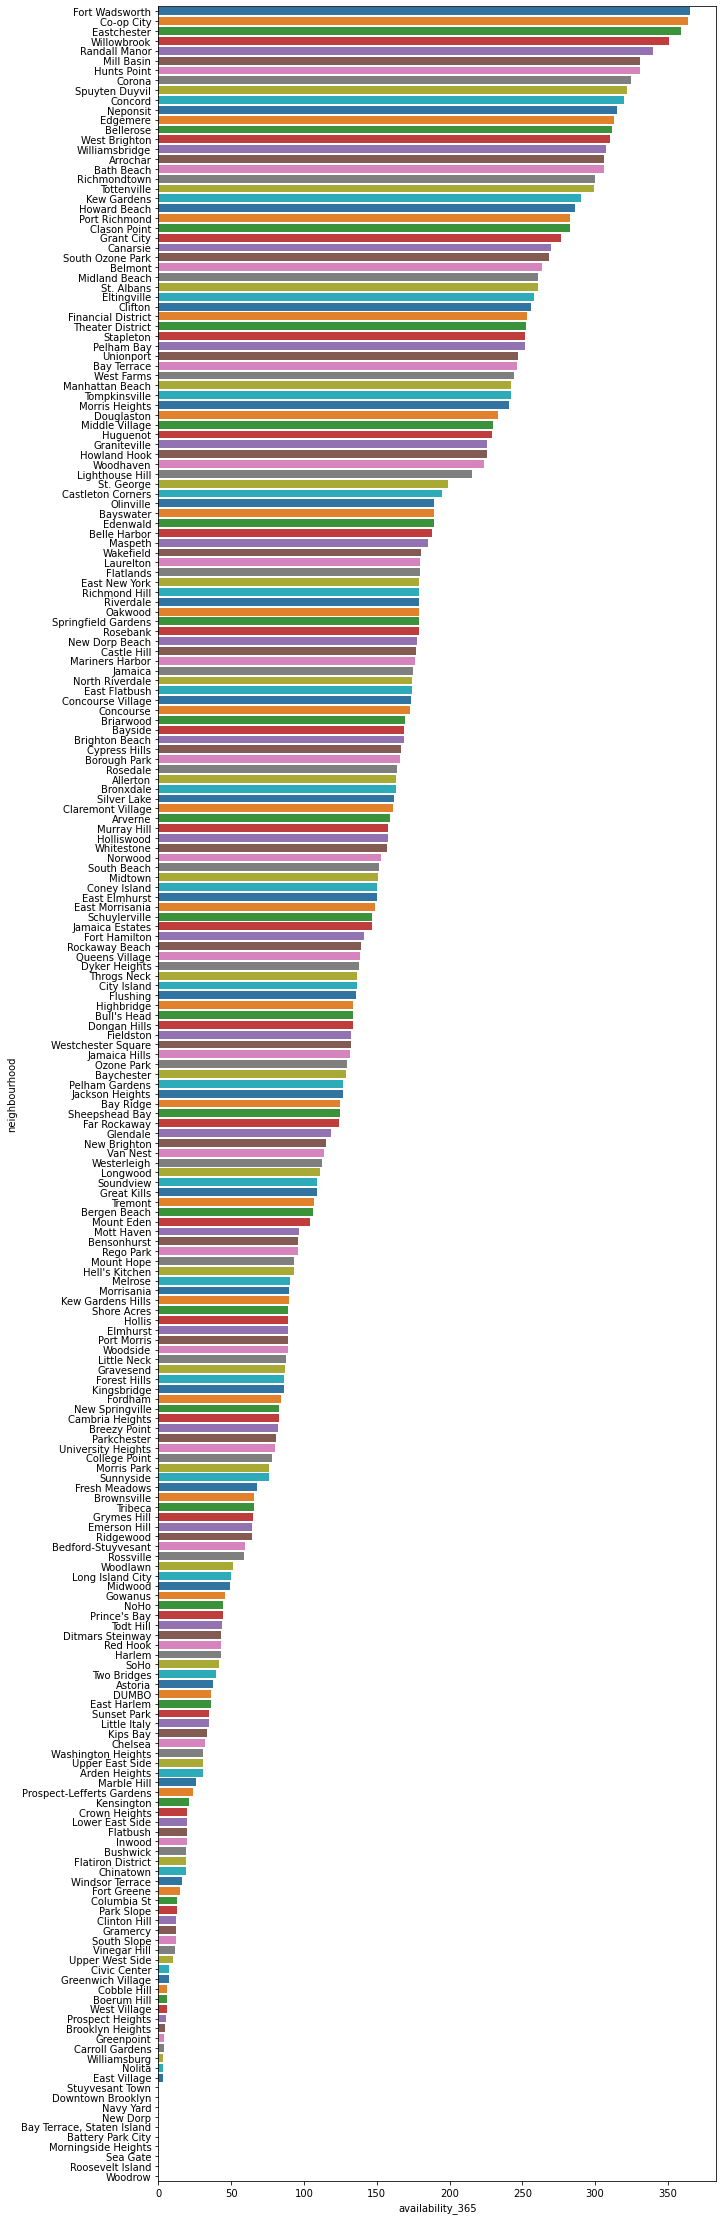

In [23]:
#Availability as per room type
Neighbourhood_availability_price = bnb_nyc.groupby("neighbourhood")["availability_365"].median().sort_values(ascending = False).reset_index()

plt.figure(figsize=(10,40))
plt.subplot()
# sns.scatterplot(x="neighbourhood", y="availability_365",hue="availability_365", Neighbourhood_availability_price=bnb_nyc)

sns.barplot(data=Neighbourhood_availability_price, x=Neighbourhood_availability_price["availability_365"], y=Neighbourhood_availability_price["neighbourhood"], palette='tab10');


Text(0.5, 1.0, 'Room availability across Neighbourhood Groups')

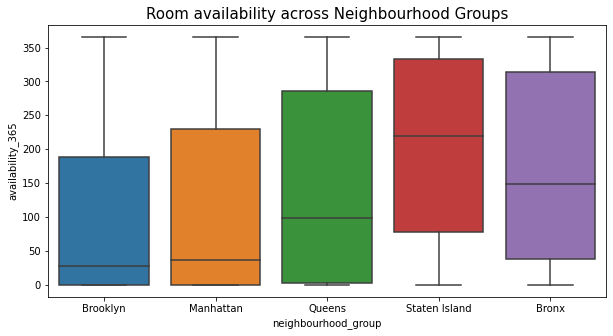

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(data=bnb_nyc, x='neighbourhood_group',y='availability_365',palette='tab10')
plt.title("Room availability across Neighbourhood Groups",size=15)

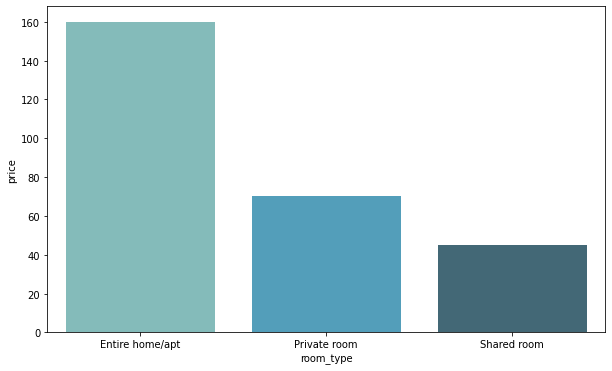

In [21]:
#Median price for room type
room_type_mean_price = bnb_nyc.groupby('room_type')['price'].median().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=room_type_mean_price, x=room_type_mean_price['room_type'], y=room_type_mean_price['price'], palette='GnBu_d');

# #Median price for room type
# room_type_mean_price = bnb_nyc_wo.groupby('room_type')['price'].median().reset_index()

# plt.figure(figsize=(10,6))
# sns.barplot(data=room_type_mean_price, x=room_type_mean_price['room_type'], y=room_type_mean_price['price'], palette='GnBu_d');


It can be observed from the above barplot that the Entire home/apt has the highest median price while the shared room has the cheapest median price.

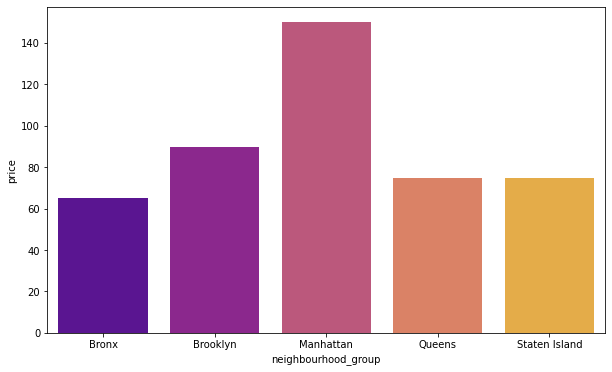

In [22]:
#Median price for Neighbourhood Group type
neighbourhood_prices = bnb_nyc.groupby("neighbourhood_group")["price"].median().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=neighbourhood_prices, x=neighbourhood_prices["neighbourhood_group"], y=neighbourhood_prices["price"], palette='plasma');

# #Median price for Neighbourhood Group type (Outliers Removed)
# neighbourhood_prices_wo = bnb_nyc_wo.groupby("neighbourhood_group")["price"].median().reset_index()

# plt.figure(figsize=(10,6))
# sns.barplot(data=neighbourhood_prices_wo, x=neighbourhood_prices_wo["neighbourhood_group"], y=neighbourhood_prices_wo["price"], palette='plasma');

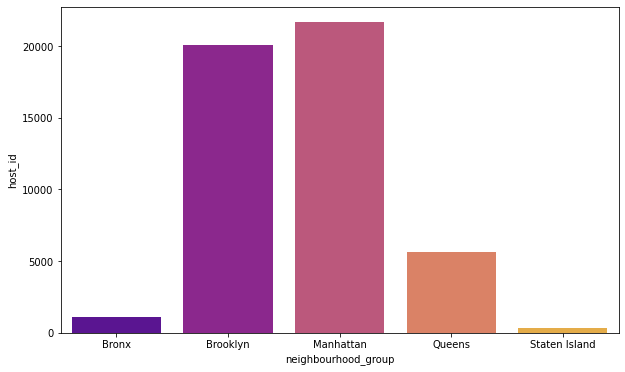

In [23]:
#Count of Host ID's distributed across Neighbourhood Group
neighbourhood_prices = bnb_nyc.groupby("neighbourhood_group")["host_id"].count().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=neighbourhood_prices, x=neighbourhood_prices["neighbourhood_group"], y=neighbourhood_prices["host_id"], palette='plasma');

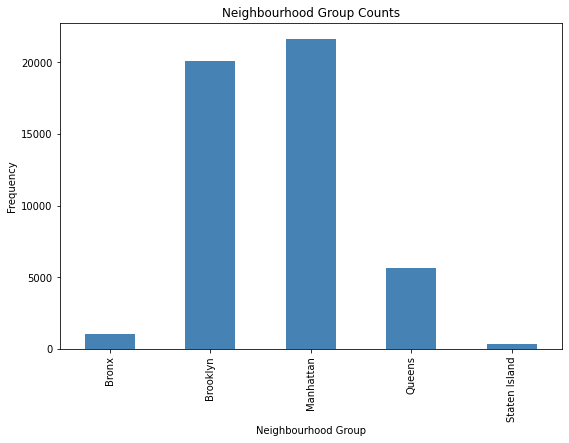

In [24]:
# Neighbourhood groups with the most number of Rooms

counts = bnb_nyc["neighbourhood_group"].value_counts().sort_index()
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
counts.plot.bar(ax = ax, color='steelblue')
ax.set_title("Neighbourhood Group" + " Counts")
ax.set_xlabel("Neighbourhood Group") 
ax.set_ylabel("Frequency")
plt.show()



# Neighbourhood groups with the most number of Rooms

# counts = bnb_nyc_wo["neighbourhood_group"].value_counts().sort_index()
# fig = plt.figure(figsize=(9, 6))
# ax = fig.gca()
# counts.plot.bar(ax = ax, color='green')
# ax.set_title("Neighbourhood Group" + " Counts [Without Outliers]")
# ax.set_xlabel("Neighbourhood Group") 
# ax.set_ylabel("Frequency")
# plt.show()






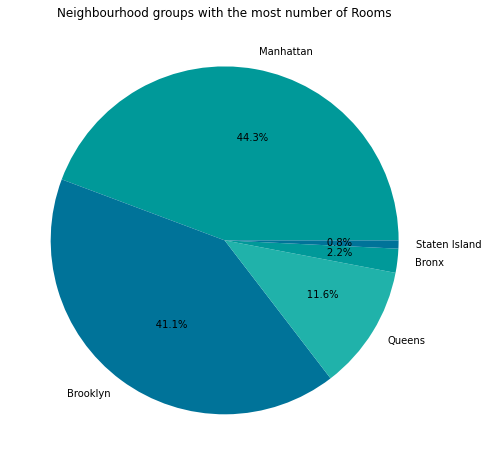

In [25]:
#Neighbourhood groups with the most number of Rooms
labels = bnb_nyc["neighbourhood_group"].value_counts().index
sizes = bnb_nyc["neighbourhood_group"].value_counts().values
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, autopct='%10.1f%%', colors = ['#009999','#007399','#20B2AA'] )
plt.title("Neighbourhood groups with the most number of Rooms", color = 'black',fontsize = 12);

# #Neighbourhood groups with the most number of Rooms (Outliers Removed)
# labels = bnb_nyc_wo["neighbourhood_group"].value_counts().index
# sizes = bnb_nyc_wo["neighbourhood_group"].value_counts().values
# plt.figure(figsize = (12,12))
# plt.pie(sizes, labels=labels, autopct='%10.1f%%', colors = ['#009999','#007399','#20B2AA'] )
# plt.title("Neighbourhood groups with the most number of Rooms [Outliers Removed]", color = 'black',fontsize = 12);

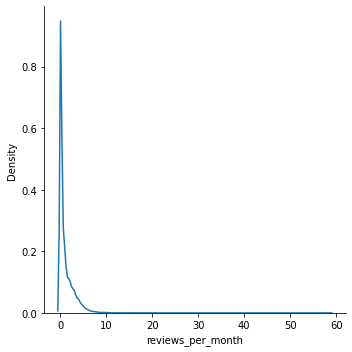

In [26]:
# plot the density distribution of reviews_per_month
sns.displot(bnb_nyc, x="reviews_per_month", kind="kde")

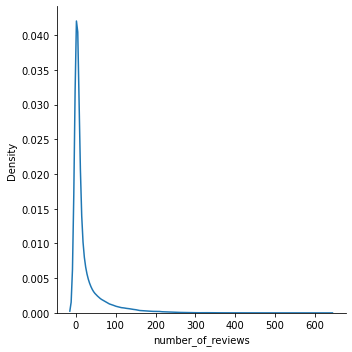

In [27]:
# plot the density distribution of number_of_reviews
sns.displot(bnb_nyc, x="number_of_reviews", kind="kde")

In [28]:
bnb_nyc[(bnb_nyc['minimum_nights'] <= 30)]

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,0.00,2,9
48891,36485057,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,0.00,2,36
48892,36485431,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,0.00,1,27
48893,36485609,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,0.00,6,2


<Figure size 1800x576 with 0 Axes>

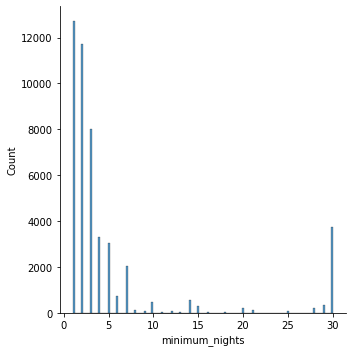

In [29]:
# the density plot for the minimum nights stay 
plt.figure(figsize=(25,8))
sns.displot(bnb_nyc, x = bnb_nyc[(bnb_nyc['minimum_nights'] <= 30)]['minimum_nights'])

We can see that the largest proportion of required minimum stays is 1-3 nights. The minimum night stays are skewed to the left, with 1 - 7 nights representing the minimum stays for a majority of all listings.

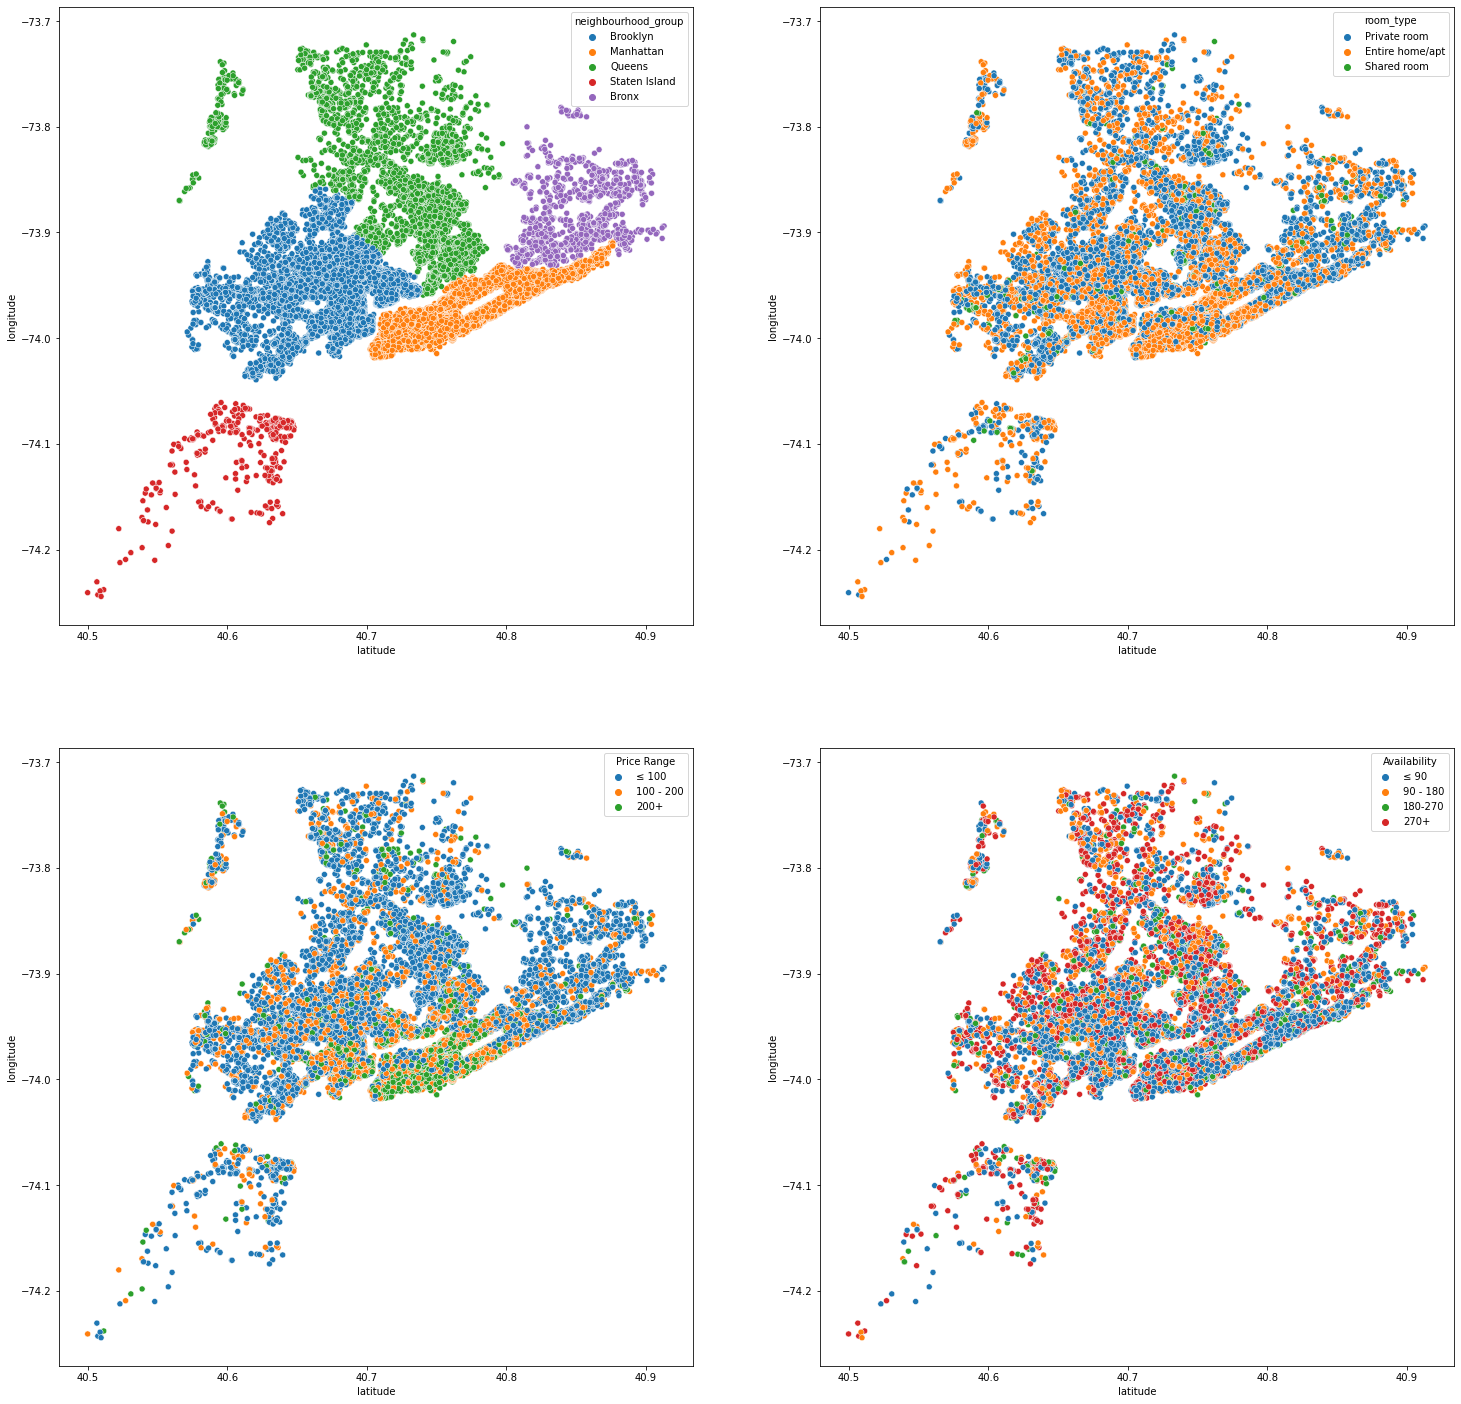

In [30]:
# plot the distribution of neighbourhoods, room_type,  price level and availability
plt.figure(figsize = (25, 25))

# add two new columns to the train_df, this is purely for the purpose of plotting / visualisation 
# bin the prices and availability into different levels
bnb_nyc["Price Range"] = pd.cut(bnb_nyc["price"], [0, 100, 200, 12000], labels=["≤ 100", "100 - 200", "200+"])
bnb_nyc["Availability"] = pd.cut(bnb_nyc["availability_365"], [0, 90, 180, 270, 365], labels=["≤ 90", "90 - 180", "180-270", "270+"])

# create 2x2 subplots showing the distribution of neighbourhoods, room_type,  price level and availability
plt.subplot(221)
sns.scatterplot(x="latitude", y="longitude",hue="neighbourhood_group", data=bnb_nyc)
plt.subplot(222)
sns.scatterplot(x="latitude", y="longitude",hue="room_type", data=bnb_nyc)
plt.subplot(223)
sns.scatterplot(x="latitude", y="longitude",hue="Price Range", data=bnb_nyc)
plt.subplot(224)
sns.scatterplot(x="latitude", y="longitude",hue="Availability", data=bnb_nyc)

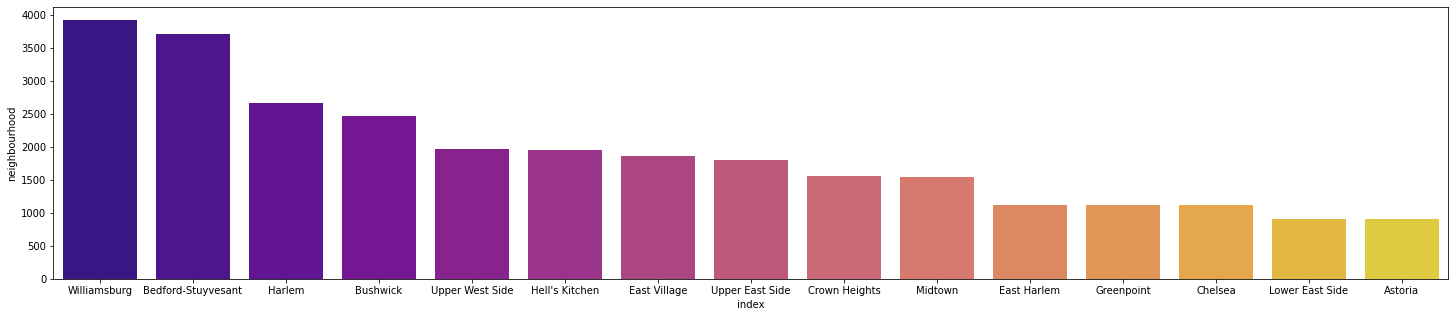

In [31]:
top_10_neighbourhoods = bnb_nyc["neighbourhood"].value_counts().reset_index().head(15)
plt.figure(figsize = (25, 5))
sns.barplot(data=top_10_neighbourhoods, x=top_10_neighbourhoods["index"], y=top_10_neighbourhoods["neighbourhood"], palette='plasma');

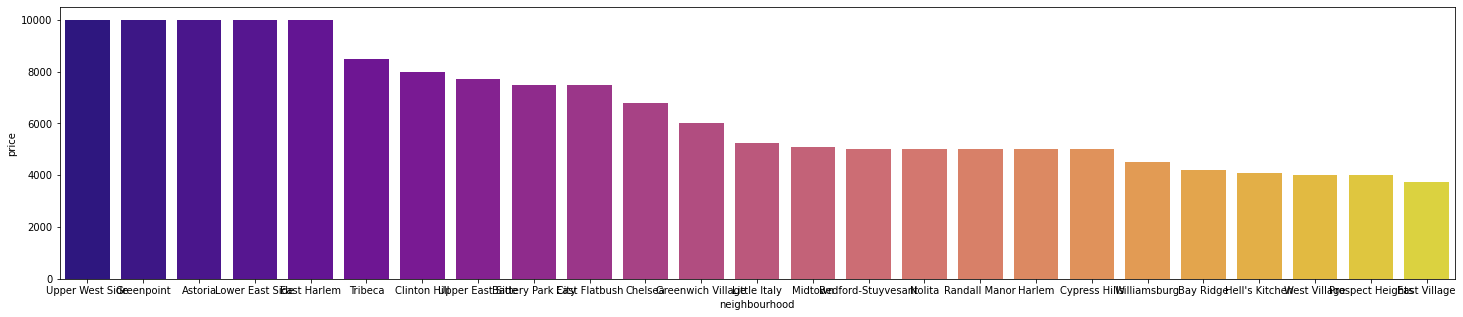

In [32]:
costliest_neighbourhoods = bnb_nyc.groupby("neighbourhood")["price"].max().sort_values(ascending = False).reset_index().head(25)
# costliest_neighbourhoods
plt.figure(figsize = (25, 5))
sns.barplot(data=costliest_neighbourhoods, x=costliest_neighbourhoods["neighbourhood"], y=costliest_neighbourhoods["price"], palette='plasma');

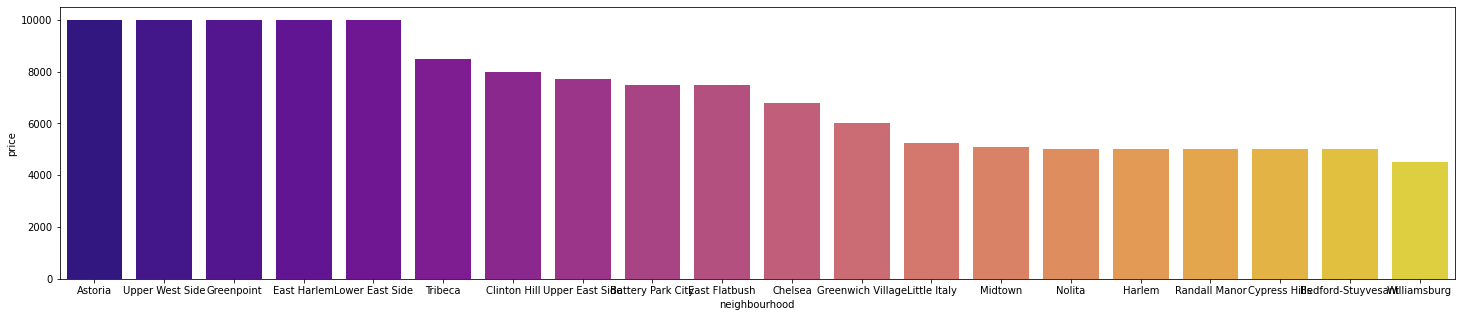

In [33]:


# P98 = bnb_nyc["price"].quantile(0.995)
Q1P = bnb_nyc["price"].quantile(0.25)
Q3P = bnb_nyc["price"].quantile(0.75)
# P98
IQRP = Q3P - Q1P
IQRP
Q3P + 1.5 * IQRP
high_priced_bnb = bnb_nyc[bnb_nyc["price"] > (Q3P + 1.5 * IQRP)]
high_priced_bnb_plot = high_priced_bnb.groupby("neighbourhood")["price"].max().sort_values(ascending = False).reset_index().head(20)
# high_priced_bnb_plot
plt.figure(figsize = (25, 5))
sns.barplot(data=high_priced_bnb_plot, x=high_priced_bnb_plot["neighbourhood"], y=high_priced_bnb_plot["price"], palette='plasma');
# outlier_bnb_nyc_price = bnb_nyc[((bnb_nyc["price"] < (Q1P - 1.5 * IQRP)) |(bnb_nyc["price"] > (Q3P + 1.5 * IQRP)))]
# bnb_nyc_wo = bnb_nyc[~((bnb_nyc["price"] < (Q1P - 1.5 * IQRP)) |(bnb_nyc["price"] > (Q3P + 1.5 * IQRP)))]
# outlier_bnb_nyc_price
# IQRP

In [34]:
# Top 25 hosts with the most number of listings

top_25_hosts= bnb_nyc.groupby(["host_id"])["id"].count().sort_values(ascending = False).reset_index().head(25)
top_25_hosts

,host_id,id
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,1475015,52


In [35]:
# Create a Dataframe consisting of details of top 25 hosts with the most number of listings

top_25_hosts_by_listings = pd.merge(bnb_nyc,top_25_hosts, on='host_id', how='inner')

top_25_hosts_by_listings

,id_x,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Price Range,Availability,id_y
0,613556,1475015,Manhattan,Tribeca,40.71655,-74.01171,Entire home/apt,130,30,2,2015-10-31,0.03,52,116,100 - 200,90 - 180,52
1,652371,1475015,Manhattan,Midtown,40.75743,-73.96939,Entire home/apt,90,30,3,2016-12-31,0.05,52,358,≤ 100,270+,52
2,652466,1475015,Manhattan,Kips Bay,40.74190,-73.98160,Entire home/apt,100,30,2,2018-06-30,0.04,52,342,≤ 100,270+,52
3,652515,1475015,Manhattan,Hell's Kitchen,40.76758,-73.98722,Entire home/apt,85,30,2,2016-08-15,0.04,52,223,≤ 100,180-270,52
4,652648,1475015,Manhattan,Kips Bay,40.74189,-73.97833,Entire home/apt,87,30,3,2018-08-15,0.05,52,363,≤ 100,270+,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1861,33830665,238321374,Manhattan,Upper West Side,40.79863,-73.96103,Private room,60,30,0,NaN,0.00,32,348,≤ 100,270+,32
1862,33831016,238321374,Manhattan,Upper West Side,40.80035,-73.96106,Private room,60,30,0,NaN,0.00,32,250,≤ 100,180-270,32
1863,33831074,238321374,Manhattan,Upper West Side,40.79995,-73.96139,Private room,60,30,0,NaN,0.00,32,83,≤ 100,≤ 90,32
1864,33831138,238321374,Manhattan,Upper West Side,40.80006,-73.96095,Private room,60,30,0,NaN,0.00,32,37,≤ 100,≤ 90,32


In [36]:
top_25_hosts_by_listings.describe(include=['object','category'])

,neighbourhood_group,neighbourhood,room_type,last_review,Price Range,Availability
count,1866,1866,1866,1866,1866,1823
unique,4,48,3,391,3,4
top,Manhattan,Financial District,Entire home/apt,NaN,200+,270+
freq,1593,323,1542,885,877,1294


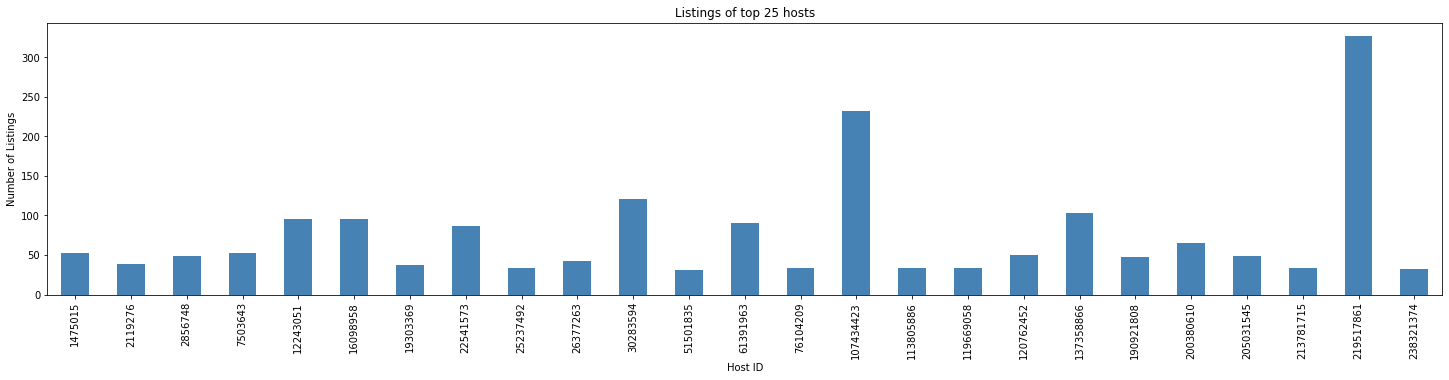

In [37]:
# Bar plot of count of AirBnB listings of top 100 hosts(by number of listings) distributed across the Neighbourhood 

counts = top_25_hosts_by_listings["host_id"].value_counts().sort_index()
fig = plt.figure(figsize=(25, 5))
ax = fig.gca()
counts.plot.bar(ax = ax, color='steelblue')
ax.set_title("Listings of top 25 hosts")
ax.set_xlabel("Host ID") 
ax.set_ylabel("Number of Listings")
plt.show()

In [38]:
top_25_hosts_by_listings["neighbourhood_group"].value_counts().sort_index()

Bronx           1
Brooklyn      155
Manhattan    1593
Queens        117
Name: neighbourhood_group, dtype: int64

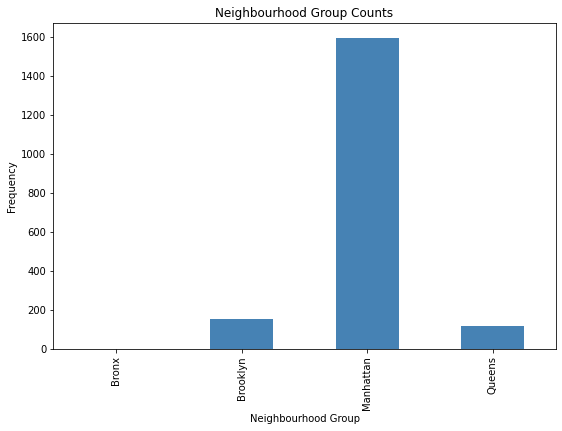

In [39]:
# Bar plot of count of AirBnB listings of top 25 hosts(by number of listings) distributed across the Neighbourhood Group 

counts = top_25_hosts_by_listings["neighbourhood_group"].value_counts().sort_index()
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
counts.plot.bar(ax = ax, color='steelblue')
ax.set_title("Neighbourhood Group" + " Counts")
ax.set_xlabel("Neighbourhood Group") 
ax.set_ylabel("Frequency")
plt.show()

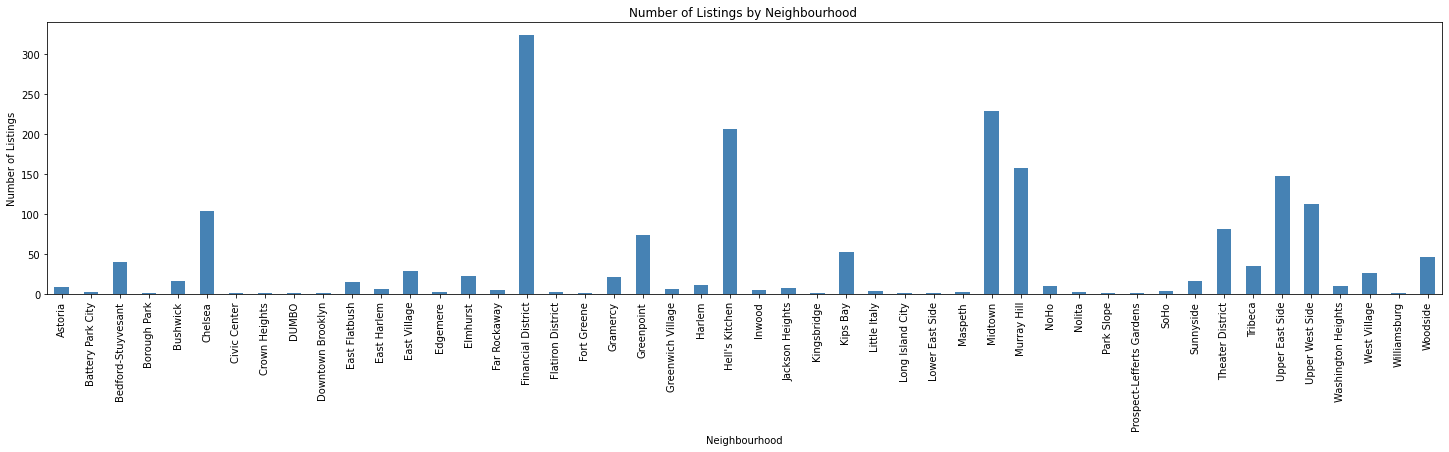

In [40]:
# Bar plot of count of AirBnB listings of top 100 hosts(by number of listings) distributed across the Neighbourhood 

counts = top_25_hosts_by_listings["neighbourhood"].value_counts().sort_index()
fig = plt.figure(figsize=(25, 5))
ax = fig.gca()
counts.plot.bar(ax = ax, color='steelblue')
ax.set_title("Number of Listings by Neighbourhood ")
ax.set_xlabel("Neighbourhood") 
ax.set_ylabel("Number of Listings")
plt.show()

In [41]:
bnb_nyc.sort_values(["minimum_nights"], ascending = False).head(50)

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Price Range,Availability
5767,4204302,17550546,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,2014-11-09,0.03,1,365,100 - 200,270+
2854,1615764,6676776,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,0.00,1,362,200+,270+
38664,30378211,200401254,Manhattan,Greenwich Village,40.73094,-73.99900,Shared room,110,999,0,NaN,0.00,1,365,100 - 200,270+
13404,10053943,2697686,Manhattan,Harlem,40.82915,-73.94034,Entire home/apt,99,999,2,2018-01-04,0.07,1,42,≤ 100,≤ 90
26341,20990053,151084261,Brooklyn,Williamsburg,40.71772,-73.95059,Private room,79,999,24,2018-06-28,1.12,6,249,≤ 100,180-270
47620,35834935,82674375,Brooklyn,Williamsburg,40.70898,-73.94885,Entire home/apt,140,500,0,NaN,0.00,1,331,100 - 200,270+
14285,11096888,2228137,Brooklyn,Kensington,40.64779,-73.97956,Private room,45,500,0,NaN,0.00,1,358,≤ 100,270+
8014,6169897,10720264,Manhattan,Harlem,40.82135,-73.95521,Entire home/apt,75,500,0,NaN,0.00,1,362,≤ 100,270+
11193,8668115,8996336,Brooklyn,Crown Heights,40.67255,-73.94914,Private room,50,500,10,2016-09-22,0.22,1,365,≤ 100,270+
7355,5431845,3680008,Queens,Long Island City,40.75104,-73.93863,Entire home/apt,134,500,30,2018-06-24,0.57,1,90,100 - 200,≤ 90


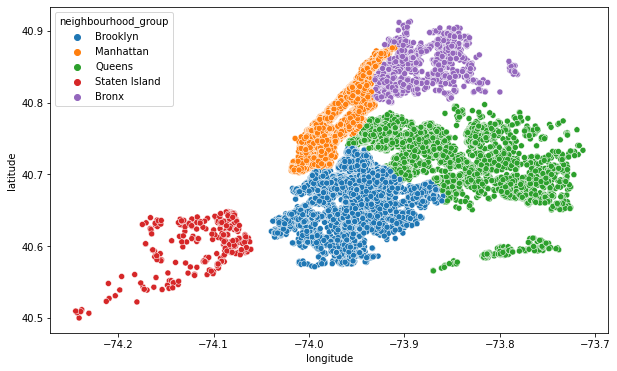

In [42]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = bnb_nyc.longitude, y = bnb_nyc.latitude, hue=bnb_nyc.neighbourhood_group)

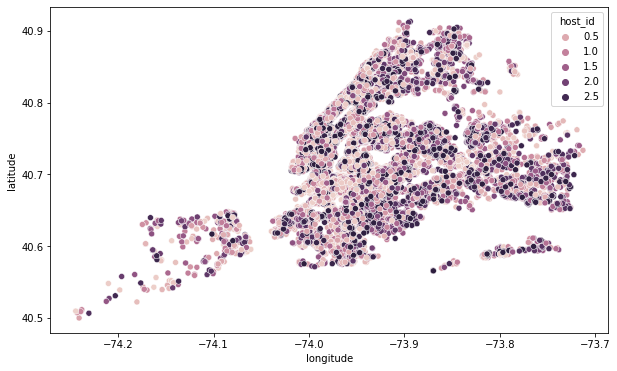

In [43]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = bnb_nyc.longitude, y = bnb_nyc.latitude, hue=bnb_nyc.host_id)


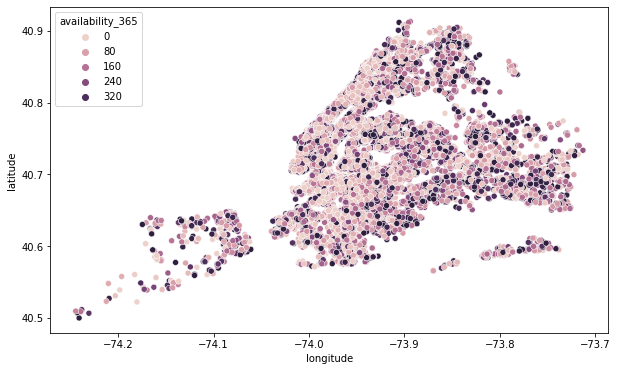

In [44]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = bnb_nyc.longitude, y = bnb_nyc.latitude, hue=bnb_nyc.availability_365)
plt.ioff()

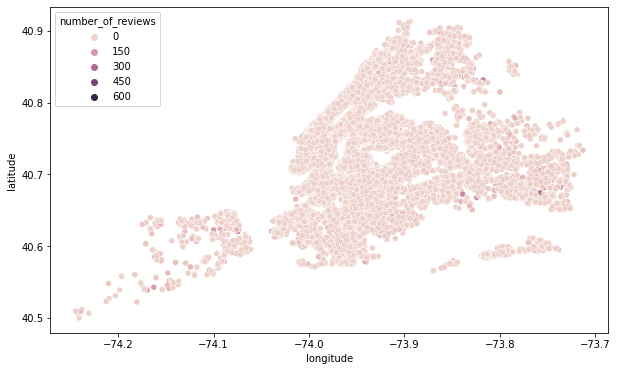

In [45]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = bnb_nyc.longitude, y = bnb_nyc.latitude, hue=bnb_nyc.number_of_reviews)
plt.ioff()

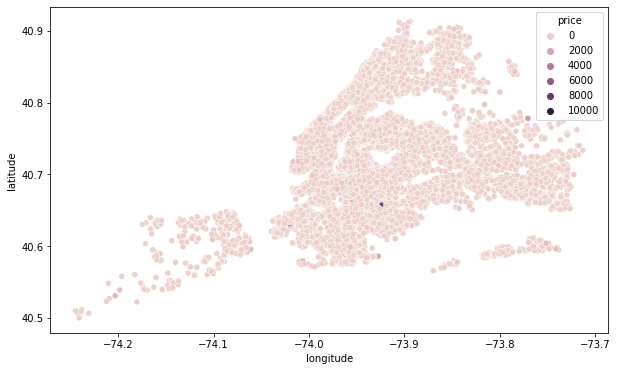

In [46]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = bnb_nyc.longitude, y = bnb_nyc.latitude, hue=bnb_nyc.price)
plt.ioff()

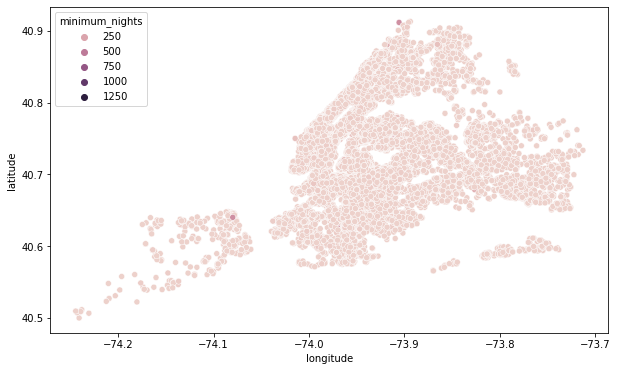

In [47]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = bnb_nyc.longitude, y = bnb_nyc.latitude, hue=bnb_nyc.minimum_nights)


In [48]:
bnb_10_reviews = bnb_nyc[bnb_nyc["number_of_reviews"] > 10]
bnb_10_reviews

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Price Range,Availability
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,200+,270+
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,≤ 100,180-270
5,5099,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,100 - 200,90 - 180
6,5121,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0,≤ 100,NaN
7,5178,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220,≤ 100,180-270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46260,35167554,264854526,Queens,East Elmhurst,40.75829,-73.88013,Private room,55,1,12,2019-07-01,9.73,1,0,≤ 100,NaN
46354,35220162,246272839,Queens,Flushing,40.76500,-73.81875,Entire home/apt,96,1,12,2019-07-03,10.91,4,159,≤ 100,90 - 180
46428,35247268,265271198,Manhattan,Hell's Kitchen,40.76495,-73.98784,Entire home/apt,330,1,13,2019-07-04,10.54,1,164,200+,90 - 180
46891,35480817,266828681,Manhattan,Hell's Kitchen,40.75493,-73.99458,Entire home/apt,320,1,12,2019-07-02,12.00,1,189,200+,180-270


In [49]:
bnb_10_reviews

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Price Range,Availability
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,200+,270+
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,≤ 100,180-270
5,5099,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,100 - 200,90 - 180
6,5121,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0,≤ 100,NaN
7,5178,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220,≤ 100,180-270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46260,35167554,264854526,Queens,East Elmhurst,40.75829,-73.88013,Private room,55,1,12,2019-07-01,9.73,1,0,≤ 100,NaN
46354,35220162,246272839,Queens,Flushing,40.76500,-73.81875,Entire home/apt,96,1,12,2019-07-03,10.91,4,159,≤ 100,90 - 180
46428,35247268,265271198,Manhattan,Hell's Kitchen,40.76495,-73.98784,Entire home/apt,330,1,13,2019-07-04,10.54,1,164,200+,90 - 180
46891,35480817,266828681,Manhattan,Hell's Kitchen,40.75493,-73.99458,Entire home/apt,320,1,12,2019-07-02,12.00,1,189,200+,180-270


In [50]:
(bnb_nyc[bnb_nyc["number_of_reviews"] > 200]).groupby(["neighbourhood","number_of_reviews"])["price"].median().sort_values().reset_index()

,neighbourhood,number_of_reviews,price
0,Woodhaven,386,29.0
1,Mount Eden,291,30.0
2,East Elmhurst,411,32.0
3,East Elmhurst,333,33.0
4,Arverne,201,35.0
...,...,...,...
564,West Village,237,350.0
565,Hell's Kitchen,287,399.0
566,Financial District,285,420.0
567,Williamsburg,250,500.0


In [51]:
bnb_nyc.groupby(["id","neighbourhood_group"])["neighbourhood_group"].count()

id        neighbourhood_group
2539      Brooklyn               1
2595      Manhattan              1
3647      Manhattan              1
3831      Brooklyn               1
5022      Manhattan              1
                                ..
36484665  Brooklyn               1
36485057  Brooklyn               1
36485431  Manhattan              1
36485609  Manhattan              1
36487245  Manhattan              1
Name: neighbourhood_group, Length: 48895, dtype: int64

In [52]:
bnb_nyc["neighbourhood_group"].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

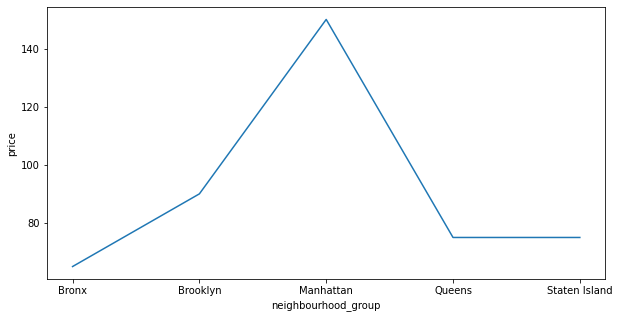

In [53]:
ng_price = bnb_nyc.groupby("neighbourhood_group")["price"].median()
plt.figure(figsize=(10, 5))

sns.lineplot(data = ng_price)

In [54]:
bnb_nyc.groupby("neighbourhood_group")["price"].median()

neighbourhood_group
Bronx             65.0
Brooklyn          90.0
Manhattan        150.0
Queens            75.0
Staten Island     75.0
Name: price, dtype: float64

In [55]:
bnb_nyc.groupby(["neighbourhood_group","room_type"])["price"].mean().unstack()

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.500099,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


In [56]:
bnb_nyc.groupby(["neighbourhood_group","room_type"])["price"].median().unstack()

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,100.0,53.5,40.0
Brooklyn,145.0,65.0,36.0
Manhattan,191.0,90.0,69.0
Queens,120.0,60.0,37.0
Staten Island,100.0,50.0,30.0


In [57]:
bnb_nyc.head(2)

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Price Range,Availability
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,100 - 200,270+
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,200+,270+


In [58]:
bnb_nyc.groupby(["host_id","host_name"])["calculated_host_listings_count"].value_counts().sort_values(ascending = False)

KeyError: ignored

In [ ]:
bnb_nyc.groupby(["host_id","host_name"])["name"].value_counts().sort_values(ascending = False)

In [ ]:
bnb_nyc.groupby("neighbourhood_group")["host_id"].value_counts()

In [ ]:
bnb_nyc.groupby(["neighbourhood_group","host_id"])["host_id"].count()

In [ ]:
bnb_nyc.groupby(["host_id","neighbourhood_group"])["neighbourhood_group"].count().unstack()